In [3]:
from sklearn.datasets import load_digits
import pandas as pd
import matplotlib.pyplot as plt
from eval_genomes import eval_genomes
import neat
import numpy as np

In [4]:
from tensorflow.keras.datasets import mnist

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize pixel values to range [0, 1]
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# Flatten 28x28 images into 784-dimensional vectors
x_train = x_train.reshape(-1, 28 * 28)
x_test = x_test.reshape(-1, 28 * 28)

# Output shapes
print(f"Training data shape: {x_train.shape}, Training labels shape: {y_train.shape}")
print(f"Test data shape: {x_test.shape}, Test labels shape: {y_test.shape}")


Training data shape: (60000, 784), Training labels shape: (60000,)
Test data shape: (10000, 784), Test labels shape: (10000,)


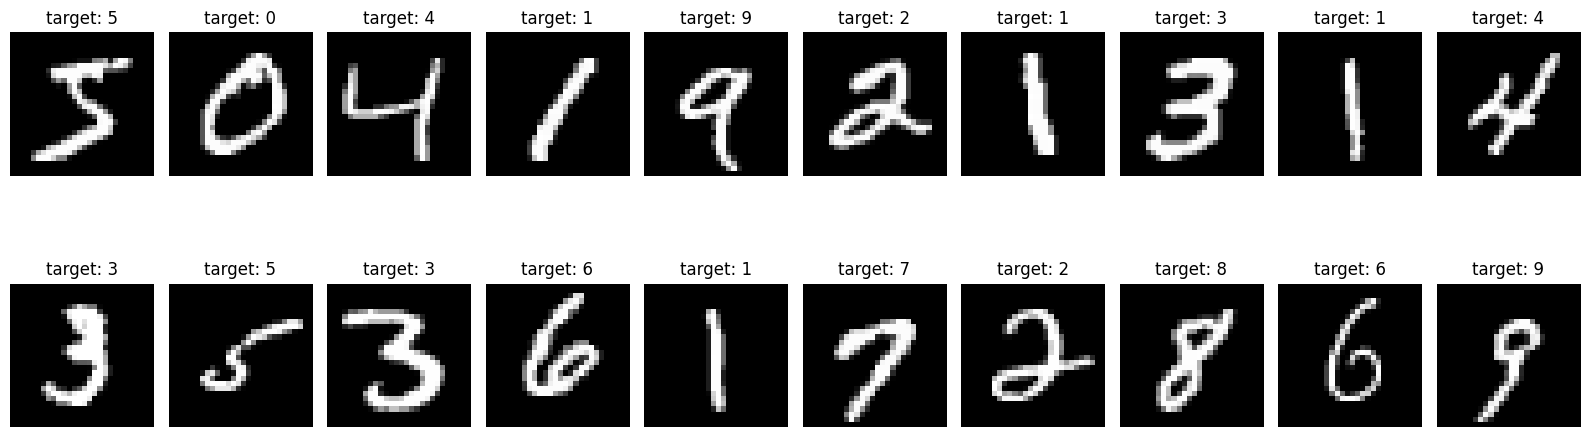

In [5]:
fig, axes = plt.subplots(2, 10, figsize=(16, 6))
for i in range(20):
    axes[i//10, i %10].imshow(x_train[i].reshape(28,28), cmap='gray');
    axes[i//10, i %10].axis('off')
    axes[i//10, i %10].set_title(f"target: {y_train[i]}")
    
plt.tight_layout()
plt.show()

In [6]:
## create subset of training data, can be reset later

x_train_subset = x_train[0:200]
y_train_subset = y_train[0:200]

len(x_train_subset[0])

784

In [15]:
config_path = "config-feedforward.txt"  # Replace with your file's path
config = neat.Config(neat.DefaultGenome, 
                     neat.DefaultReproduction,
                     neat.DefaultSpeciesSet, 
                     neat.DefaultStagnation, 
                     config_path)


population = neat.Population(config)
stats = neat.StatisticsReporter()
population.add_reporter(stats)
population.add_reporter(neat.StdOutReporter(True))

In [11]:
len(x_train_subset)

200

In [16]:
def eval_genomes(genomes, config):

    inputs = x_train_subset
    labels = y_train_subset

    for genome_id, genome in genomes:
        # Create a neural network from the genome
        net = neat.nn.FeedForwardNetwork.create(genome, config)
        
        # Initialize fitness score
        fitness = 0
        trials_ = len(inputs)

        for xi, label in zip(inputs, labels):
            # Get the network's prediction
            output = net.activate(xi)

            # Find the predicted label (node with the highest activation)
            predicted_label = output.index(max(output))

            # Reward correct predictions
            if predicted_label == label:
                fitness += 1  # Increment fitness for correct prediction

        fitness_normalized = fitness / trials_
        genome.fitness = fitness_normalized


In [17]:
# Number of generations to evolve
num_generations = 20

# Run NEAT
winner = population.run(eval_genomes, num_generations)

# Save the best genome
print("Best genome:\n", winner)



 ****** Running generation 0 ****** 

Population's average fitness: 0.10225 stdev: 0.03404
Best fitness: 0.17500 - size: (10, 7840) - species 1 - id 7
Average adjusted fitness: 0.052
Mean genetic distance 1.141, standard deviation 0.276
Population of 20 members in 1 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    0    20      0.2    0.052     0
Total extinctions: 0
Generation time: 40.146 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.12175 stdev: 0.03306
Best fitness: 0.17500 - size: (10, 7840) - species 1 - id 7
Average adjusted fitness: 0.057
Mean genetic distance 0.839, standard deviation 0.277
Population of 20 members in 1 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    1    20      0.2    0.057     1
Total extinctions: 0
Generation time: 51.234 sec (45.690 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.13025 st

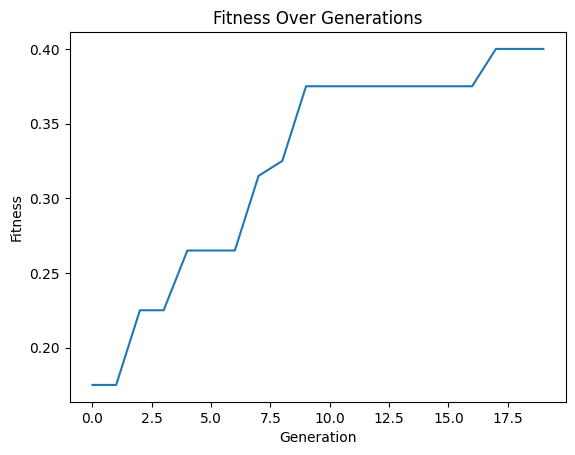

In [18]:
generations = range(len(stats.most_fit_genomes))
fitness_scores = [genome.fitness for genome in stats.most_fit_genomes]

plt.plot(generations, fitness_scores)
plt.xlabel("Generation")
plt.ylabel("Fitness")
plt.title("Fitness Over Generations")
plt.show()
